# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/var/folders/bm/9gklnwns2kxcypy3sp68vlc80000gn/T/ipykernel_89795/2016790164.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

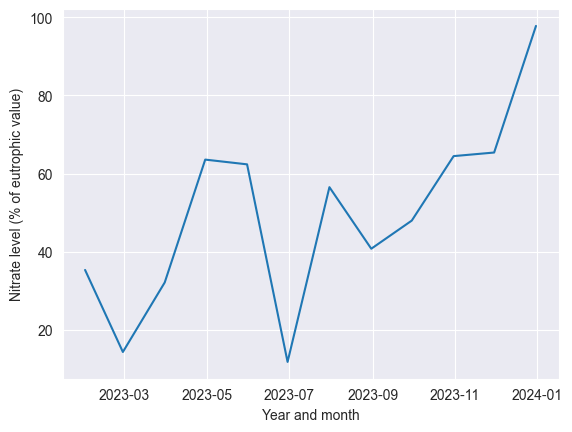

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/var/folders/bm/9gklnwns2kxcypy3sp68vlc80000gn/T/ipykernel_89795/4159229068.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

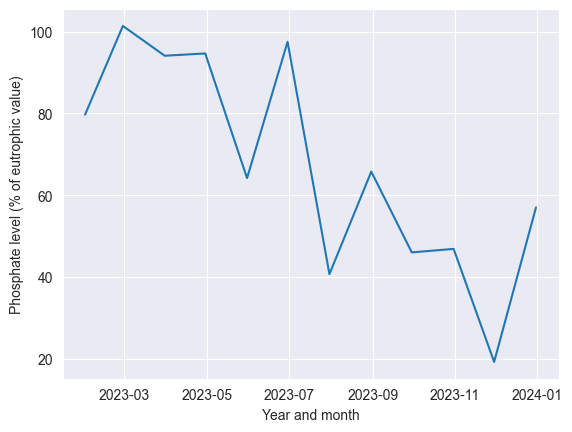

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

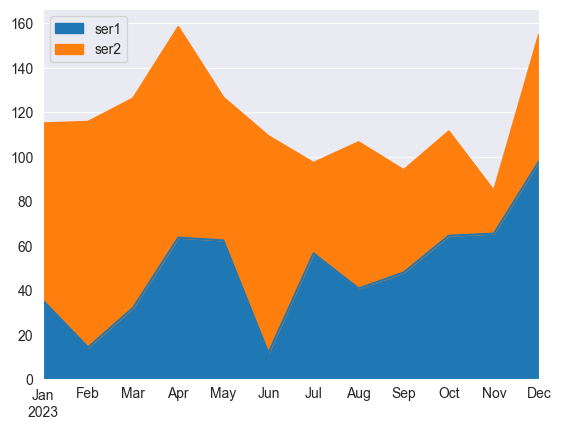

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

### Advantages of Area plot over multiple line plots

- Area plot for this case is very pertinent as its about harmful phosphate level and nitrate level in water sample. and this is visually  more pertinent than line plot and  it conveys the message more effectively.

- It shows the cumulative presence of both the chemicals and how it has changed over time.

- It is easier to compare the two chemicals in a single plot.

- It shows the area under the curve, which can be useful for understanding the total amount of each chemical present over time.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

####  Importing the Favorita sales data notebook (this was identified in the last semester by my team member Kristina T ), I did the data cleaning in the Favorita.ipynb (notebook) available in my github

https://github.com/dhalderBU/BU_homework-week4/blob/main/Favorita%20Stores.ipynb

Importing it so as the dataframe creating cleaning ,a imputation is done out side of this notebook.

In [5]:
#import the notebook so as this notebook remains clean and only do the data analysis and graphing
%run "Favorita Stores.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
It worked!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date 

In [6]:
df_favorita = final_df

df_favorita.head()
df_favorita.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        int64         
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  transactions  float64       
 11  dcoilwtico    float64       
 12  type_y        object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(8)
memory usage: 396.1+ MB


In [7]:
#since will need to multiple graphs so create methods
def plot_numeric_features(df):
    # plot histograms for sales and onpromotion in scale of 10,000
    scale_factor = 10000
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # sales distribution
    daily_sales = df.groupby('date')['sales'].sum() / scale_factor
    sns.histplot(data=daily_sales, bins=50, ax=axes[0])
    axes[0].set_title('Distribution of Daily Sales (in 10,000s)')
    axes[0].set_xlabel('Daily Sales (× 10,000)')
    axes[0].set_ylabel('Count')

    # on promotion distribution
    daily_promo = df.groupby('date')['onpromotion'].sum() / scale_factor
    sns.histplot(data=daily_promo, bins=30, ax=axes[1])
    axes[1].set_title('Distribution of Daily Items on Promotion (in 10,000s)')
    axes[1].set_xlabel('Number of Items on Promotion (× 10,000)')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

    #  summary statistics for promotions
    print("\nPromotion Summary Statistics (in 10,000s):")
    print("-" * 50)
    print(f"Mean Daily Items on Promotion: {daily_promo.mean():.2f}")
    print(f"Median Daily Items on Promotion: {daily_promo.median():.2f}")
    print(f"Max Daily Items on Promotion: {daily_promo.max():.2f}")

def plot_categorical_features(df, cat_cols):
    # bar plots for categorical columns
    n_cols = len(cat_cols)
    n_rows = (n_cols + 1) // 2  # 2 plots per row

    for i in range(0, n_cols, 2):
        fig, axes = plt.subplots(1, 2, figsize=(20, 6))

        # first plot
        value_counts = df[cat_cols[i]].value_counts().sort_index()
        sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, ax=axes[0])
        axes[0].set_title(f'Distribution of {cat_cols[i]}')
        axes[0].set_xlabel(cat_cols[i])
        axes[0].set_ylabel('Count')
        axes[0].tick_params(axis='x', rotation=45)

        # second plot (if available)
        if i + 1 < n_cols:
            value_counts = df[cat_cols[i+1]].value_counts().sort_index()
            sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, ax=axes[1])
            axes[1].set_title(f'Distribution of {cat_cols[i+1]}')
            axes[1].set_xlabel(cat_cols[i+1])
            axes[1].set_ylabel('Count')
            axes[1].tick_params(axis='x', rotation=45)
        else:
            fig.delaxes(axes[1])

        plt.tight_layout()
        plt.show()

def plot_datetime_feature(df, datetime_col):
    # plot time bases features
    fig = plt.figure(figsize=(20, 15))
    # change the scale factor so the graoh doesnt show in millions
    scale_factor = 10000

    # by year
    plt.subplot(311)
    year_sales = df.groupby(df[datetime_col].dt.year)['sales'].sum() / scale_factor
    year_sales.plot(kind='bar')
    plt.title('Total Sales by Year (in 10,000s)')
    plt.xlabel('Year')
    plt.ylabel('Total Sales (× 10,000)')

    # by month
    plt.subplot(312)
    month_sales = df.groupby(df[datetime_col].dt.month)['sales'].sum() / scale_factor
    month_sales.plot(kind='bar')
    plt.title('Total Sales by Month (in 10,000s)')
    plt.xlabel('Month')
    plt.ylabel('Total Sales (× 10,000)')

    # by day of week
    plt.subplot(313)
    day_sales = df.groupby(df[datetime_col].dt.day_name())['sales'].sum() / scale_factor
    day_sales.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                      'Friday', 'Saturday', 'Sunday']).plot(kind='bar')
    plt.title('Total Sales by Day of Week (in 10,000s)')
    plt.xlabel('Day of Week')
    plt.ylabel('Total Sales (× 10,000)')

    plt.tight_layout()
    plt.show()

# call all the helper methods created above in this section to keep it clean
def create_histograms_dataset(df):
    #create histogram for selected data columns and types
    scale_factor = 10000

    categorical_cols = ['city', 'state', 'type_x', 'type_y', 'locale',
                       'locale_name', 'transferred']

    datetime_col = 'date'

    #first do sales and promotion distributions
    print("=== Sales and Promotion Distributions ===")
    plot_numeric_features(df)

    #then do histogram of categorical features
    print("\n=== Categorical Features ===")
    plot_categorical_features(df, categorical_cols)

    #then do datetime features
    print("\n=== DateTime Feature ===")
    plot_datetime_feature(df, datetime_col)

    # Create a figure with 3 subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # now lets do the other important plots
    # Total Sales by Store Type
    store_sales = df.groupby('type_x')['sales'].sum() / scale_factor
    store_sales.plot(kind='bar', ax=axes[0])
    axes[0].set_title('Total Sales by Store Type (in 10,000s)')
    axes[0].set_ylabel('Total Sales (× 10,000)')
    axes[0].tick_params(axis='x', rotation=45)

    # sales by cluster
    cluster_sales = df.groupby('cluster')['sales'].sum() / scale_factor
    cluster_sales.plot(kind='bar', ax=axes[1])
    axes[1].set_title('Total Sales by Cluster (in 10,000s)')
    axes[1].set_ylabel('Total Sales (× 10,000)')

    # total Items on promotion by Store Type
    promo_by_type = df.groupby('type_x')['onpromotion'].sum() / scale_factor
    promo_by_type.plot(kind='bar', ax=axes[2])
    axes[2].set_title('Total Items on Promotion by Store Type (in 10,000s)')
    axes[2].set_ylabel('Total Items on Promotion (× 10,000)')
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

=== Sales and Promotion Distributions ===


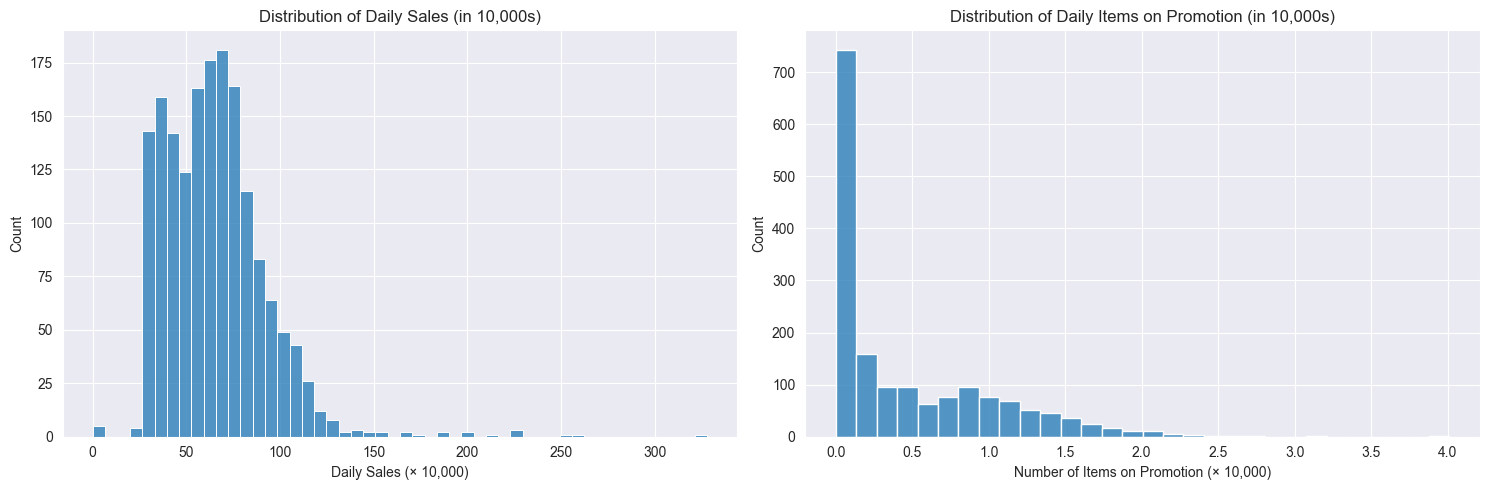


Promotion Summary Statistics (in 10,000s):
--------------------------------------------------
Mean Daily Items on Promotion: 0.47
Median Daily Items on Promotion: 0.23
Max Daily Items on Promotion: 4.01

=== Categorical Features ===


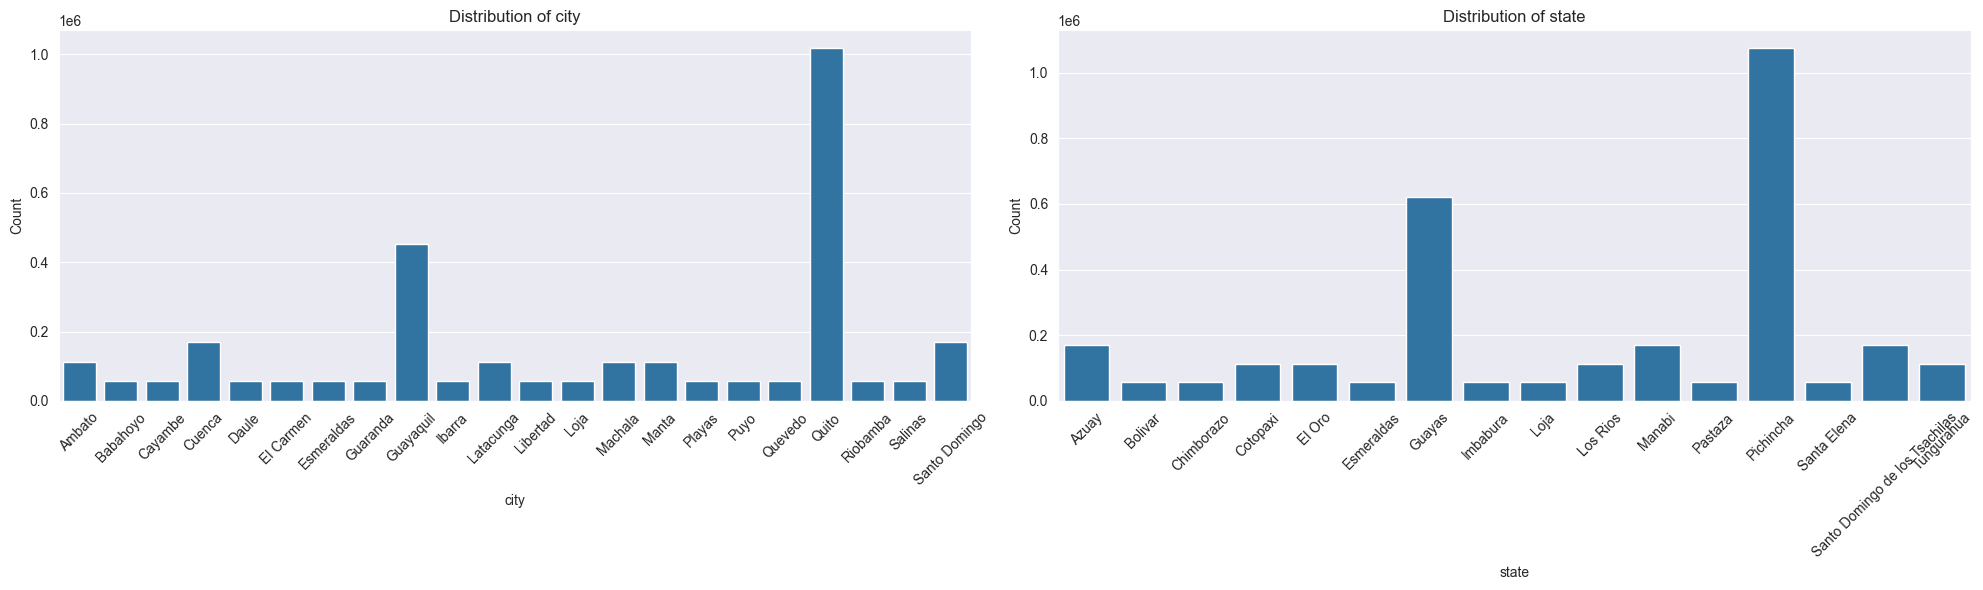

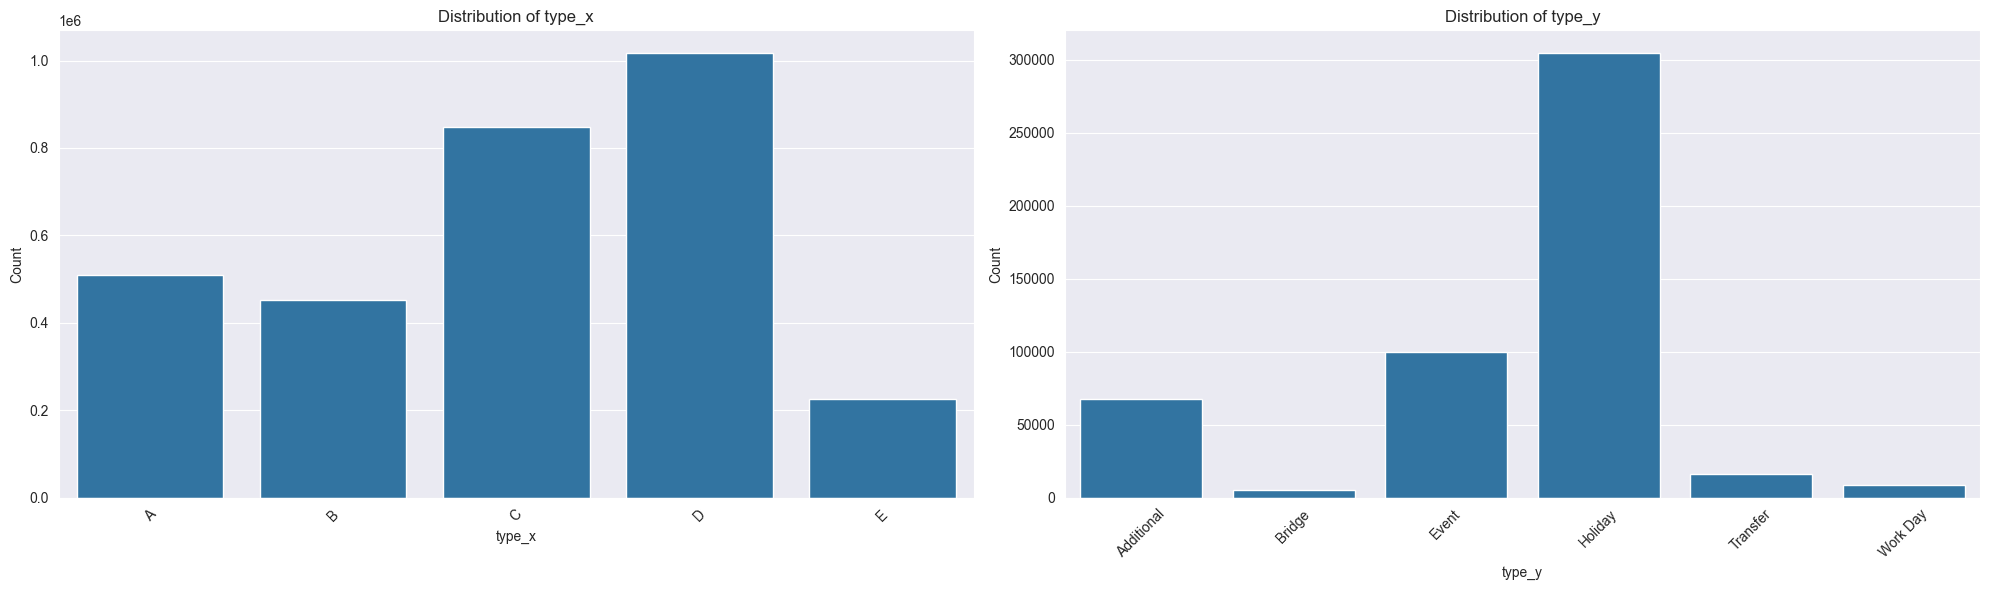

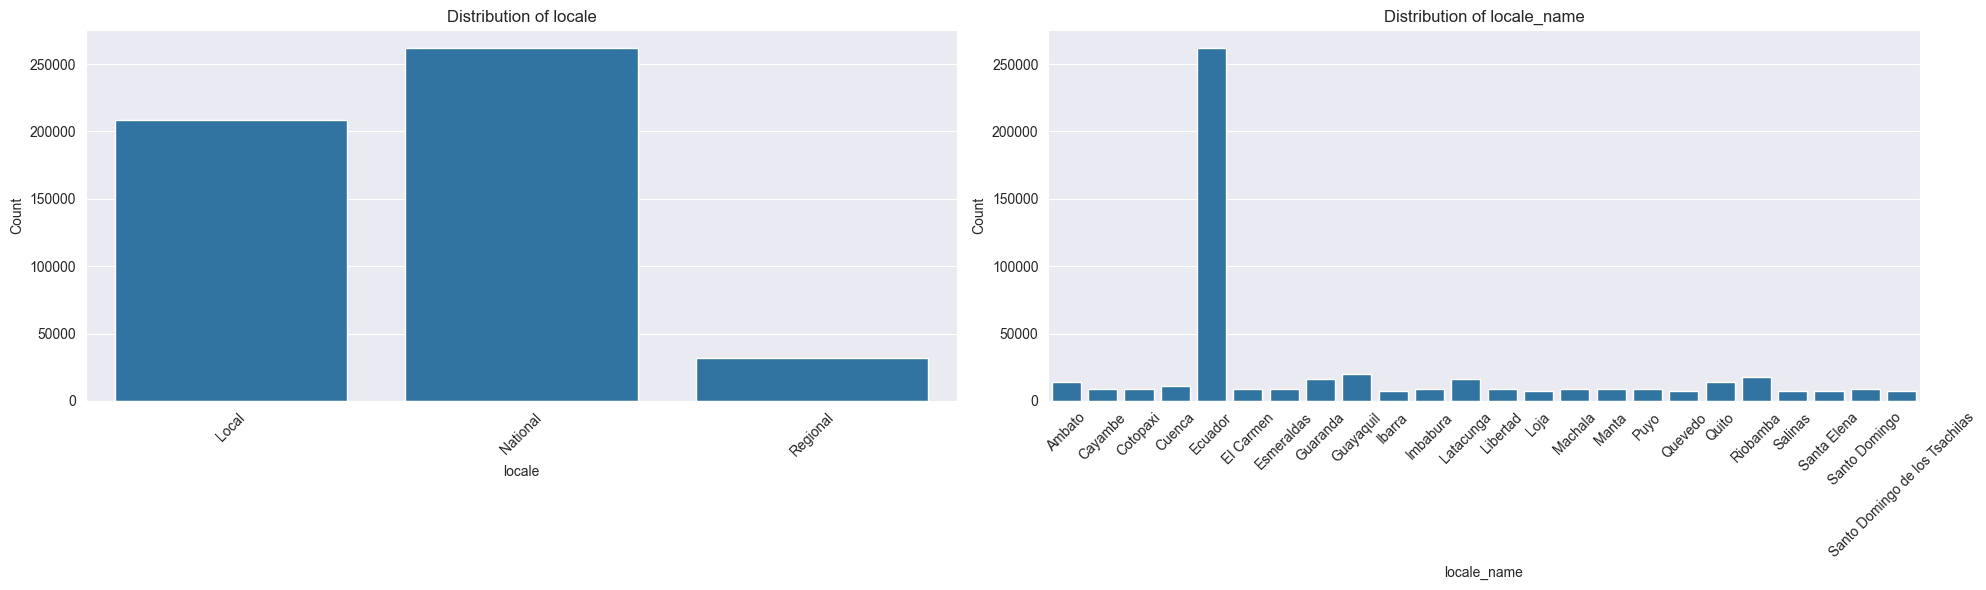

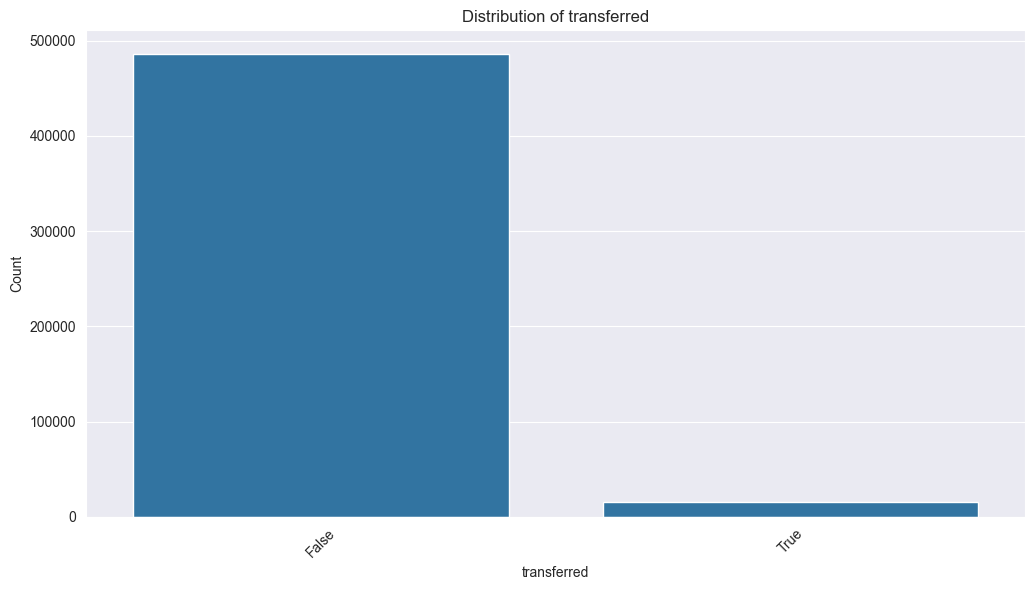


=== DateTime Feature ===


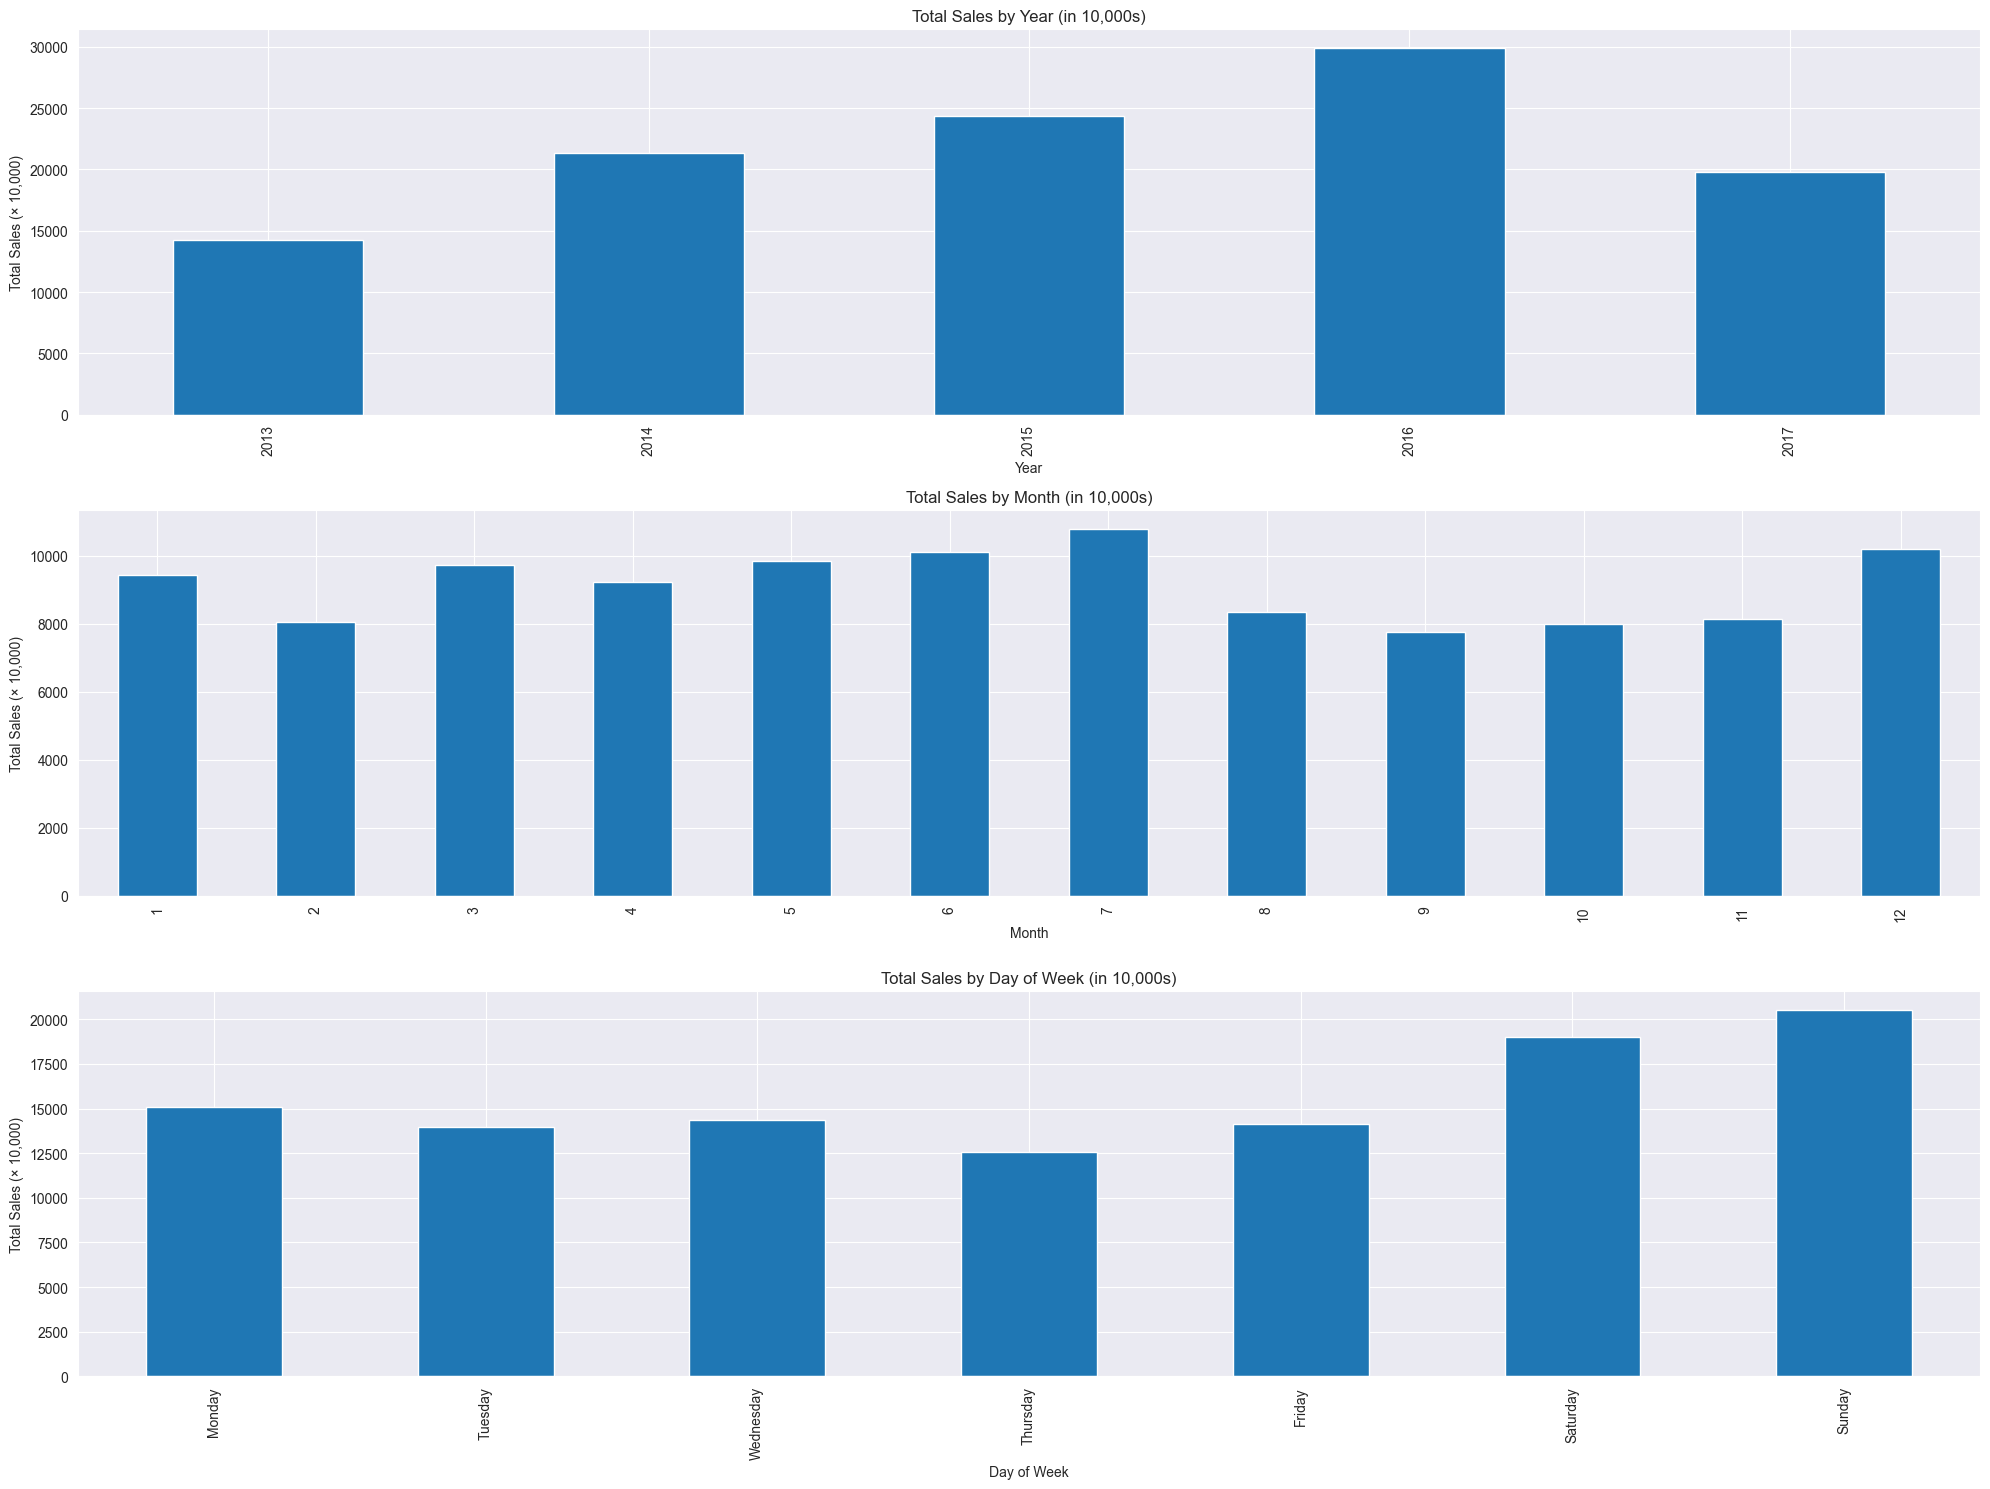

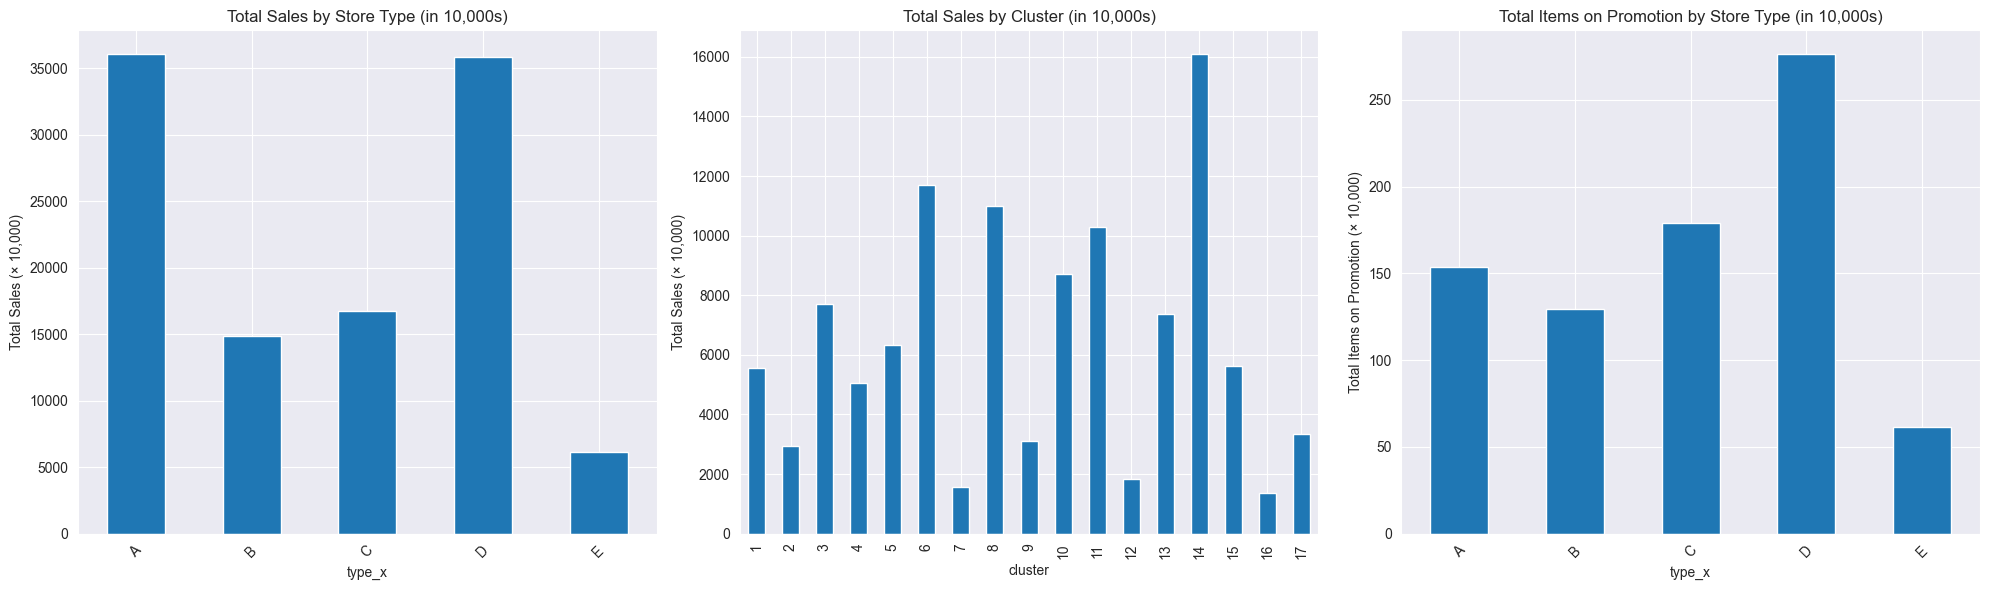

In [8]:
# Now create this histograms
create_histograms_dataset(df_favorita)

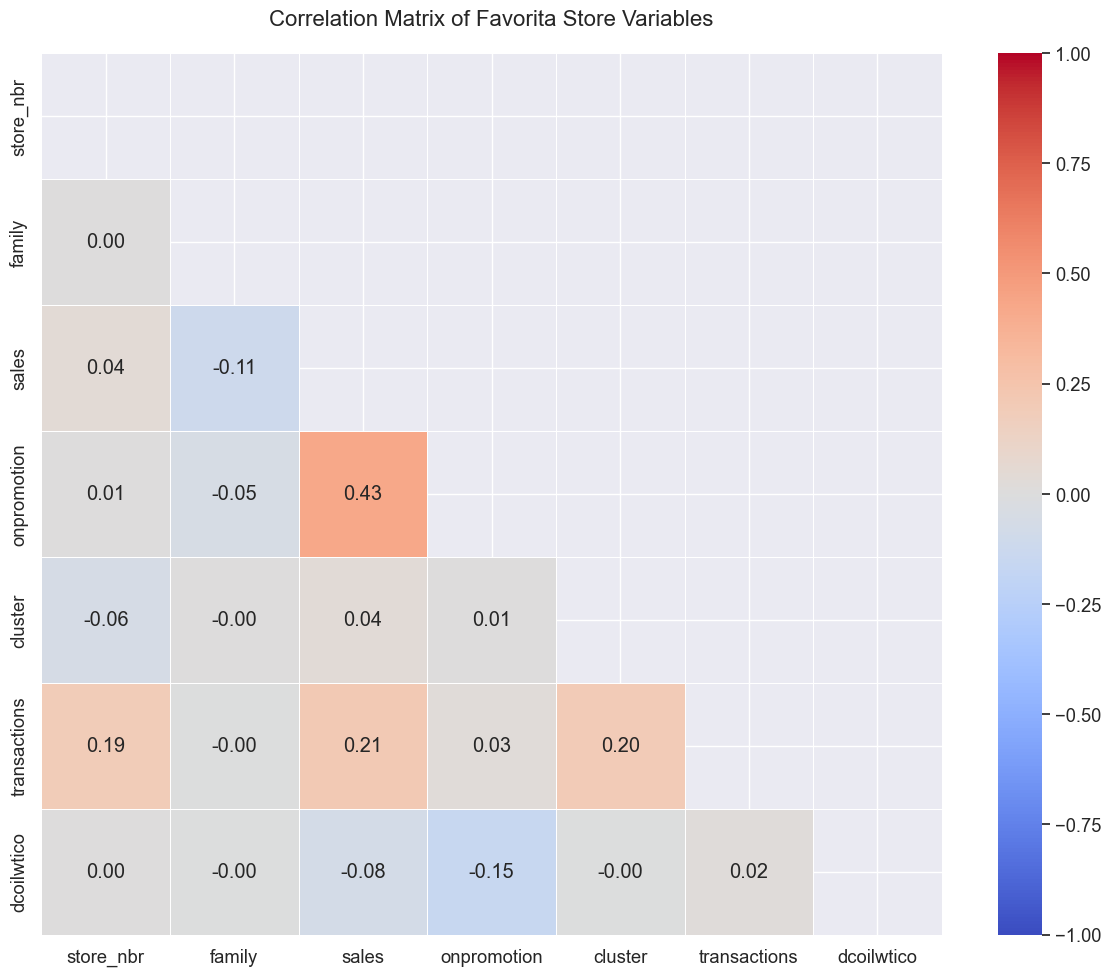

Top correlations in the dataset:
sales         onpromotion     0.428241
onpromotion   sales           0.428241
sales         transactions    0.214848
transactions  sales           0.214848
cluster       transactions    0.196110
transactions  cluster         0.196110
store_nbr     transactions    0.189656
transactions  store_nbr       0.189656
onpromotion   dcoilwtico      0.150659
dcoilwtico    onpromotion     0.150659
dtype: float64


In [9]:
#Correlation matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only numeric columns for correlation analysis
# From your DataFrame info, the relevant numeric columns appear to be:
# 'sales', 'transactions', 'dcoilwtico', and possibly 'onpromotion' and 'cluster'

# Select numeric columns (excluding ID fields which won't provide meaningful correlations)
numeric_columns = df_favorita.select_dtypes(include=['float64', 'int64'])
numeric_columns = numeric_columns.drop(['id'], axis=1)  # Remove the ID column

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Step 3: Create a visually appealing heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)

# Create a heatmap with a color map that shows negative correlations in one color
# and positive correlations in another
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Create mask for upper triangle
heatmap = sns.heatmap(correlation_matrix,
                      mask=mask,  # Hide the upper triangle for a cleaner look
                      annot=True,  # Show the correlation values
                      cmap='coolwarm',  # Blue to red color map
                      vmin=-1, vmax=1,  # Set limits for correlation values
                      linewidths=0.5,  # Add separation between cells
                      fmt='.2f')  # Format to show 2 decimal places

plt.title('Correlation Matrix of Favorita Store Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Step 4: Display the top correlations (optional)
# This shows the pairs of variables with the strongest relationships
def get_top_correlations(corr_matrix, n=10):
    # Flatten the matrix and get the indices of the top n absolute correlations
    flattened = corr_matrix.abs().unstack()
    # Remove self-correlations (which are always 1)
    flattened = flattened[flattened < 1]
    # Get top n correlations
    top_corr = flattened.nlargest(n)
    return top_corr

print("Top correlations in the dataset:")
top_correlations = get_top_correlations(correlation_matrix)
print(top_correlations)



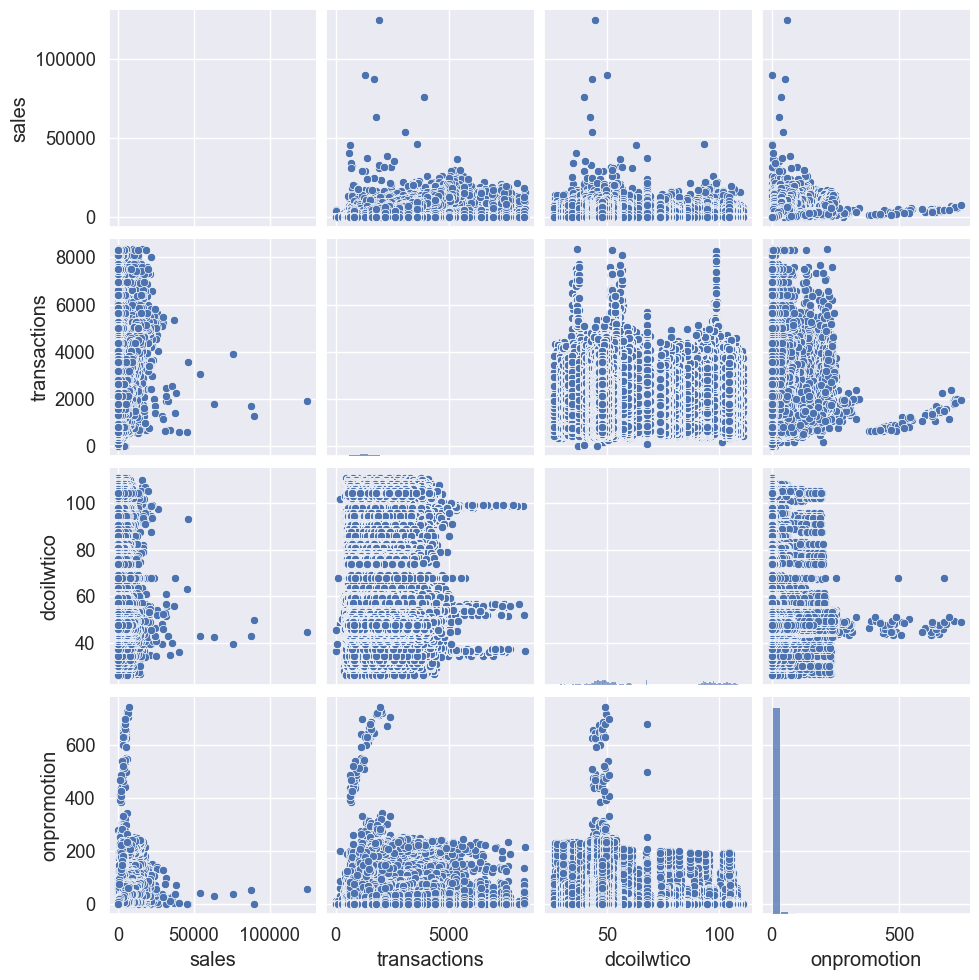

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select  the numeric columns for the pairplot
numeric_cols = ['sales', 'transactions', 'dcoilwtico', 'onpromotion']

# Create the pairplot
sns.pairplot(df_favorita[numeric_cols])

# Show the plot
plt.show()


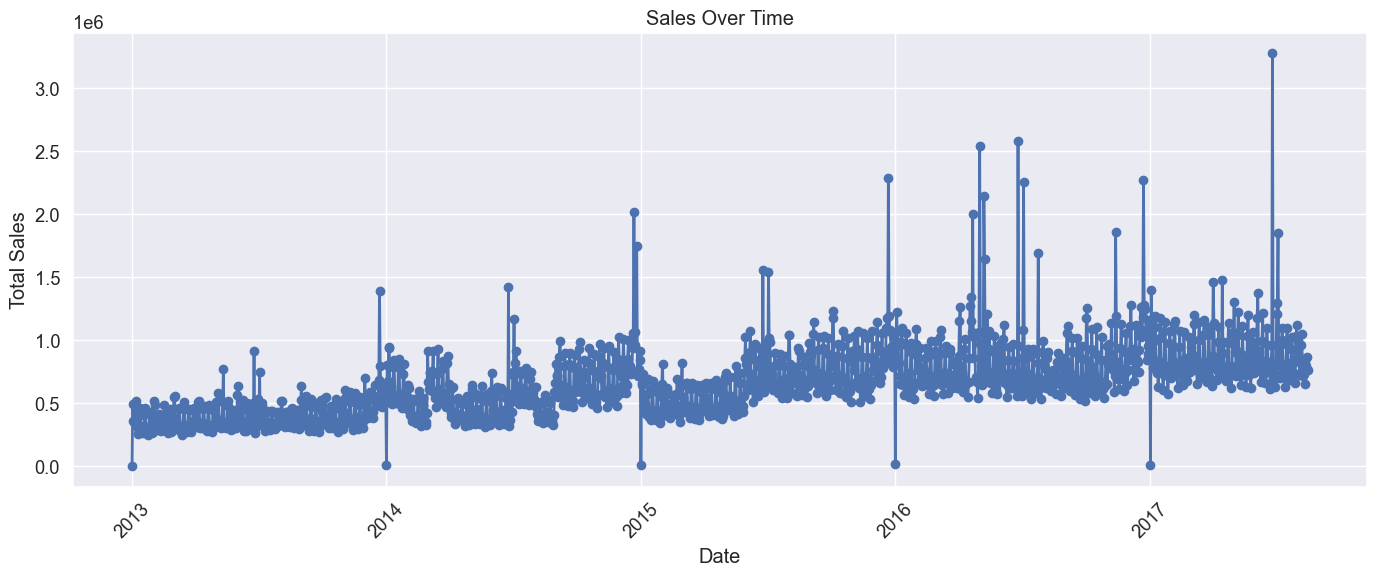

In [11]:
# do group by date and sales
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'date' and calculate the sum of 'sales' for each date
df_grouped = df_favorita.groupby('date')['sales'].sum().reset_index()

# Plot the sales over time
plt.figure(figsize=(14, 6))
plt.plot(df_grouped['date'], df_grouped['sales'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### The Violin plot and boxplot did not show much usefull information as the data is not normally distributed and the aggregate data are highly influenced by the summer holidays

In [12]:
sns.violinplot(data=df_favorita, x='year', y='sales', inner='quart')
plt.title('Sales Distribution by Year')
plt.show()


ValueError: Could not interpret value `year` for `x`. An entry with this name does not appear in `data`.

Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

- The data shows that the sales are increasing over time, which is a good sign. The data also shows that the sales are higher in the summer months, which is expected.The sa;es are  also higher during holidays.

- The data shows there is high correlation between sales and transactions, which is expected. The data also shows that there is a high correlation between sales and onpromotion, which is also expected.

Do you see any outliers? (Data points that are far from the rest of the data).

- The data shows that there are some outliers in the sales data, which could be due to holidays or other events.

Are any data items highly correlated with each other, suggesting that they are redundant?

- The data shows that there is a high correlation between sales and transactions, which is expected. The data also shows that there is a high correlation between sales and onpromotion, which is also expected.

- correlation matrix shows that there is a high correlation between sales and transactions, which is expected. The data also shows that there is a high correlation between sales and onpromotion, which is also expected.

For the line plots, do you see a trend or pattern over time? Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- The data shows that the sales are increasing over time, which is a good sign. The data also shows that the sales are higher in the summer months and holidays which is expected.

Can you think of any confounding variables? (Third variables that could explain any correlations between other variables. These third variables may or may not be reported in the dataset.

- We could not find any confounding variables in the dataset.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

#### Drawing figure  3.23 from page 97 of Storytelling with Data

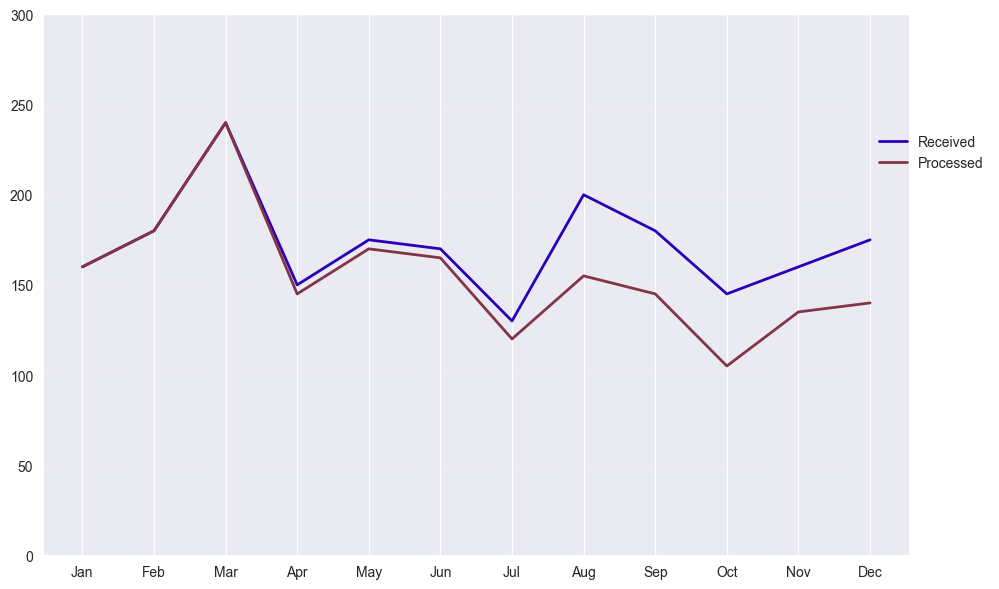

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create data for received and processed
received = [160, 180, 240, 150, 175, 170, 130, 200, 180, 145, 160, 175]
processed = [160, 180, 240, 145, 170, 165, 120, 155, 145, 105, 135, 140]

# Create DataFrame for plotting
df = pd.DataFrame({
    'Month': months,
    'Received': received,
    'Processed': processed
})

#df

# create the plot
plt.figure(figsize=(10, 6))

# plot the lines with specific colors as in image from figma site https://www.figma.com/color-wheel/
plt.plot(df['Month'], df['Received'],  color='#2a01b7', linewidth=2, label='Received')
plt.plot(df['Month'], df['Processed'], color='#833546', linewidth=2, label='Processed')

#y-axis limits and ticks
plt.ylim(0, 300)
plt.yticks([0, 50, 100, 150, 200, 250, 300])

# remove spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# legend - place it outside the plot area
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.8), frameon=False)

# Add gridlines
plt.grid(axis='y', linestyle='-', alpha=0.2)

# Add labels and title
plt.xlabel('')  # No x-axis label as in the original
plt.ylabel('')  # No y-axis label as in the original

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()